In [111]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pandas as pd
import numpy as np
import os

In [121]:
data_path = "E:/Datasets/MOT20/train/MOT20-02/img1/"
img_path = os.listdir(data_path)

for i in range(len(img_path)):
    img_path[i] = data_path+img_path[i]

In [124]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.track(img_path)  # predict on an image
# print(results)

In [96]:
import cv2
import numpy as np
 

frameSize = (540, 960)

out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 60, frameSize)

for i in range(255):
    img = np.ones((540, 960, 3), dtype=np.uint8)*i
    out.write(img)

out.release()

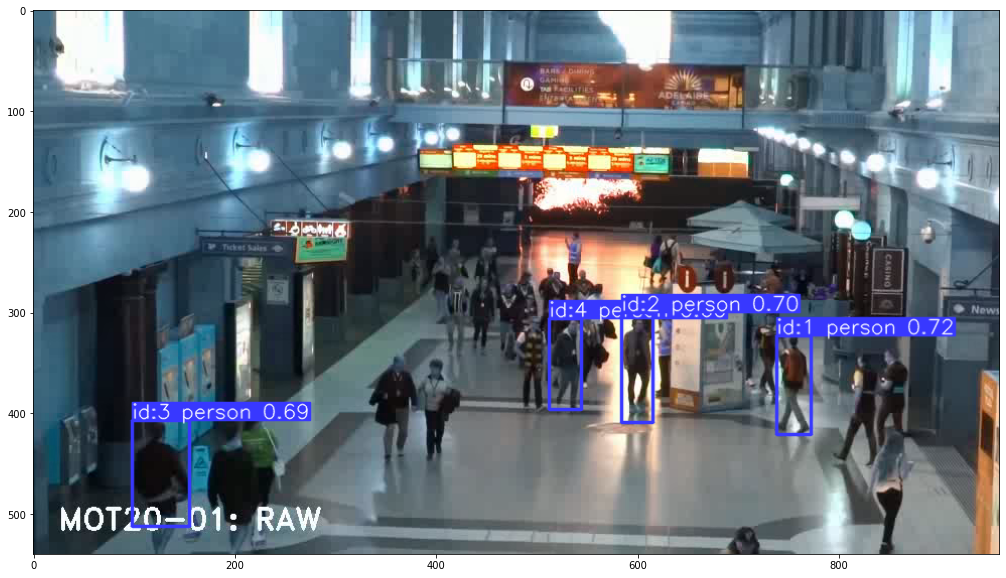

In [73]:
plt.figure(figsize=(20,10))
plt.imshow(results[0].plot())

In [64]:
frames = []

for r in results:
    frames.append({
        int(id) : np.array([float(xywhn[0] + xywhn[2]/2), float(xywhn[2] + xywhn[3]/2)])
        for id, xywhn in zip(r.boxes.id, r.boxes.xywhn)})
        
df = pd.DataFrame(frames)

# calculating velocity [image norm size/frame]
for i in df.columns:
    df[f'v_{i}'] = df[i].diff().pow(2).apply(np.sum).pow(1/2)

<AxesSubplot:>

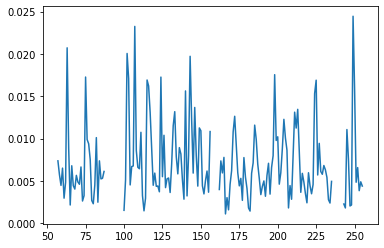

In [104]:
df['v_15'].plot()